In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [5]:

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1.0/255)
testing_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory('D:/360DigitMG/Ptoject-2/data/drowsy.v1i.folder/train', target_size=(224, 224), batch_size=32, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory('D:/360DigitMG/Ptoject-2/data/drowsy.v1i.folder/valid', target_size=(224, 224), batch_size=32, class_mode='binary')
test_generator=testing_datagen.flow_from_directory("D:/360DigitMG/Ptoject-2/data/drowsy.v1i.folder/test",target_size=(224, 224), batch_size=32, class_mode='binary')

Found 7006 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.
Found 1001 images belonging to 2 classes.


In [3]:
# Model Definition
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Sequential([
    resnet_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])



In [4]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



In [5]:
# Train the Model
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)


Epoch 1/5
219/219 [==============================] - 4002s 18s/step - loss: 0.1687 - accuracy: 0.9590 - val_loss: 2.8757 - val_accuracy: 0.5113
Epoch 2/5
219/219 [==============================] - 5097s 23s/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 1.9532 - val_accuracy: 0.4822
Epoch 3/5
219/219 [==============================] - 5193s 24s/step - loss: 0.0174 - accuracy: 0.9953 - val_loss: 1.8681 - val_accuracy: 0.5133
Epoch 4/5
219/219 [==============================] - 4138s 19s/step - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.7356 - val_accuracy: 0.6823
Epoch 5/5
219/219 [==============================] - 3323s 15s/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.1211 - val_accuracy: 0.9630


In [6]:
# Save the Model
model.save('resnet_drowsiness_model.h5')

C:\Users\MK PERUMALLA\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('resnet_drowsiness_model.h5')




In [6]:
# Verify that the model has been loaded correctly
loss, accuracy = loaded_model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy*100:.2f}%')

63/63 [==============================] - 205s 3s/step - loss: 0.1211 - accuracy: 0.9630
Validation accuracy: 96.30%


In [11]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the model
model = load_model('resnet_drowsiness_model.h5')

def preprocess_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(224, 224))  # Resize to match the input size expected by the model
    # Convert the image to array
    img_array = img_to_array(img)
    # Expand dimensions to match the input shape (1, 150, 150, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Rescale the image (same as during training)
    img_array =  img_array / 255.0
    return img_array,img

def predict_image(image_path):
    # Preprocess the image
    img_array = preprocess_image(image_path)[0]
    # Make prediction
    prediction = model.predict(img_array)
    # The output is a probability, convert it to class label
    if prediction[0] > 0.5:
        return 'non-drowsy'
    else:
        return 'drowsy'
    


In [12]:
def predict(path):
    import matplotlib.pyplot as plt
    # Example usage
    plt.imshow(preprocess_image(path)[1])
    result = predict_image(path)
    print(f'The predicted class for the image is: {result}')


1/1 [==============================] - 0s 147ms/step
The predicted class for the image is: non-drowsy


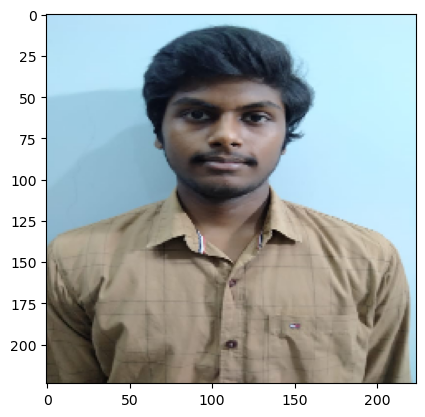

In [18]:
predict("D:/MY PICS/WhatsApp Image 2021-08-19 at 21.34.04.jpeg")